In [1]:
import pandas as pd
from datetime import datetime
fish_df = pd.read_csv(filepath_or_buffer='/kaggle/input/reef-ecological-assessment-del-norte/Alacranes Reef and Bajos del Norte reef ecological assesment/fish_data.csv')
fish_df['date'] = fish_df['day'].apply(lambda x: datetime(year=2019, month=8, day=x))
fish_df = fish_df.drop(columns=['label', 'habitat', 'area', 'year', 'month', 'day'])

fish_df.head()

,region,island,side,id_reef,reef,reef_joined,protection_status,latitude,longitude,transect,...,trophic_group,trophic_level,functional_groups,a_ord,b_pen,species,quantity,size,biomass,date
0,Bajo del Norte,Bajos del Norte,Bajos,11,Bajos del norte 2,7,OA,23.242433,-88.714417,2,...,Zooplanktivore,3.82,planktivores,0.0170,3.120,Abudefduf saxatilis,1,4,0.0002,2019-08-10
1,Alacranes,Arrecife Alacranes,Windward,9,Tata y Rafa,3,MPA,22.553851,-89.653701,6,...,Carnivore,3.34,macro-invertivores,0.0443,2.829,Balistes vetula,1,30,0.1114,2019-08-09
2,Bajo del Norte,Bajos del Norte,Bajos,15,Final,10,OA,23.171183,-88.951301,3,...,Carnivore,3.34,macro-invertivores,0.0443,2.829,Balistes vetula,1,30,0.1114,2019-08-11
3,Alacranes,Arrecife Alacranes,Leeward,7,Alacranes 7,4,NTZ,22.505151,-89.796617,3,...,Herbivore,2.00,browsers,0.0194,3.000,Sparisoma rubripinne,1,26,0.0568,2019-08-09
4,Alacranes,Arrecife Alacranes,Leeward,4,Sardinas,4,NTZ,22.505367,-89.795701,5,...,Herbivore,2.00,browsers,0.0194,3.000,Sparisoma rubripinne,1,35,0.1386,2019-08-08


In [2]:
pd.concat(axis=1, objs=[
        fish_df.dtypes.to_frame().rename(columns={0: 'dtype'}),
        fish_df.nunique().to_frame().rename(columns={0:'nunique'})])

,dtype,nunique
region,object,2
island,object,2
side,object,3
id_reef,int64,15
reef,object,15
reef_joined,int64,10
protection_status,object,3
latitude,float64,14
longitude,float64,13
transect,int64,6


<Axes: ylabel='Frequency'>

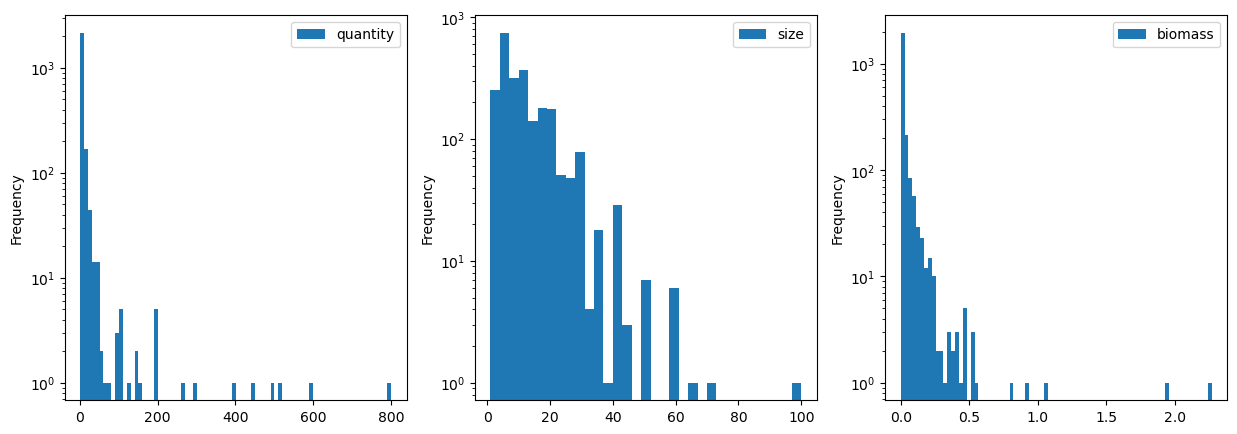

In [3]:
from matplotlib.pyplot import subplots
fig, ax= subplots(ncols=3, figsize=(15, 5))
fish_df['quantity'].plot.hist(ax=ax[0], bins=80, legend=True, log=True)
fish_df['size'].plot.hist(ax=ax[1], bins=33, legend=True, log=True)
fish_df['biomass'].plot.hist(ax=ax[2], bins=80, legend=True, log=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='a_ord', ylabel='b_pen'>

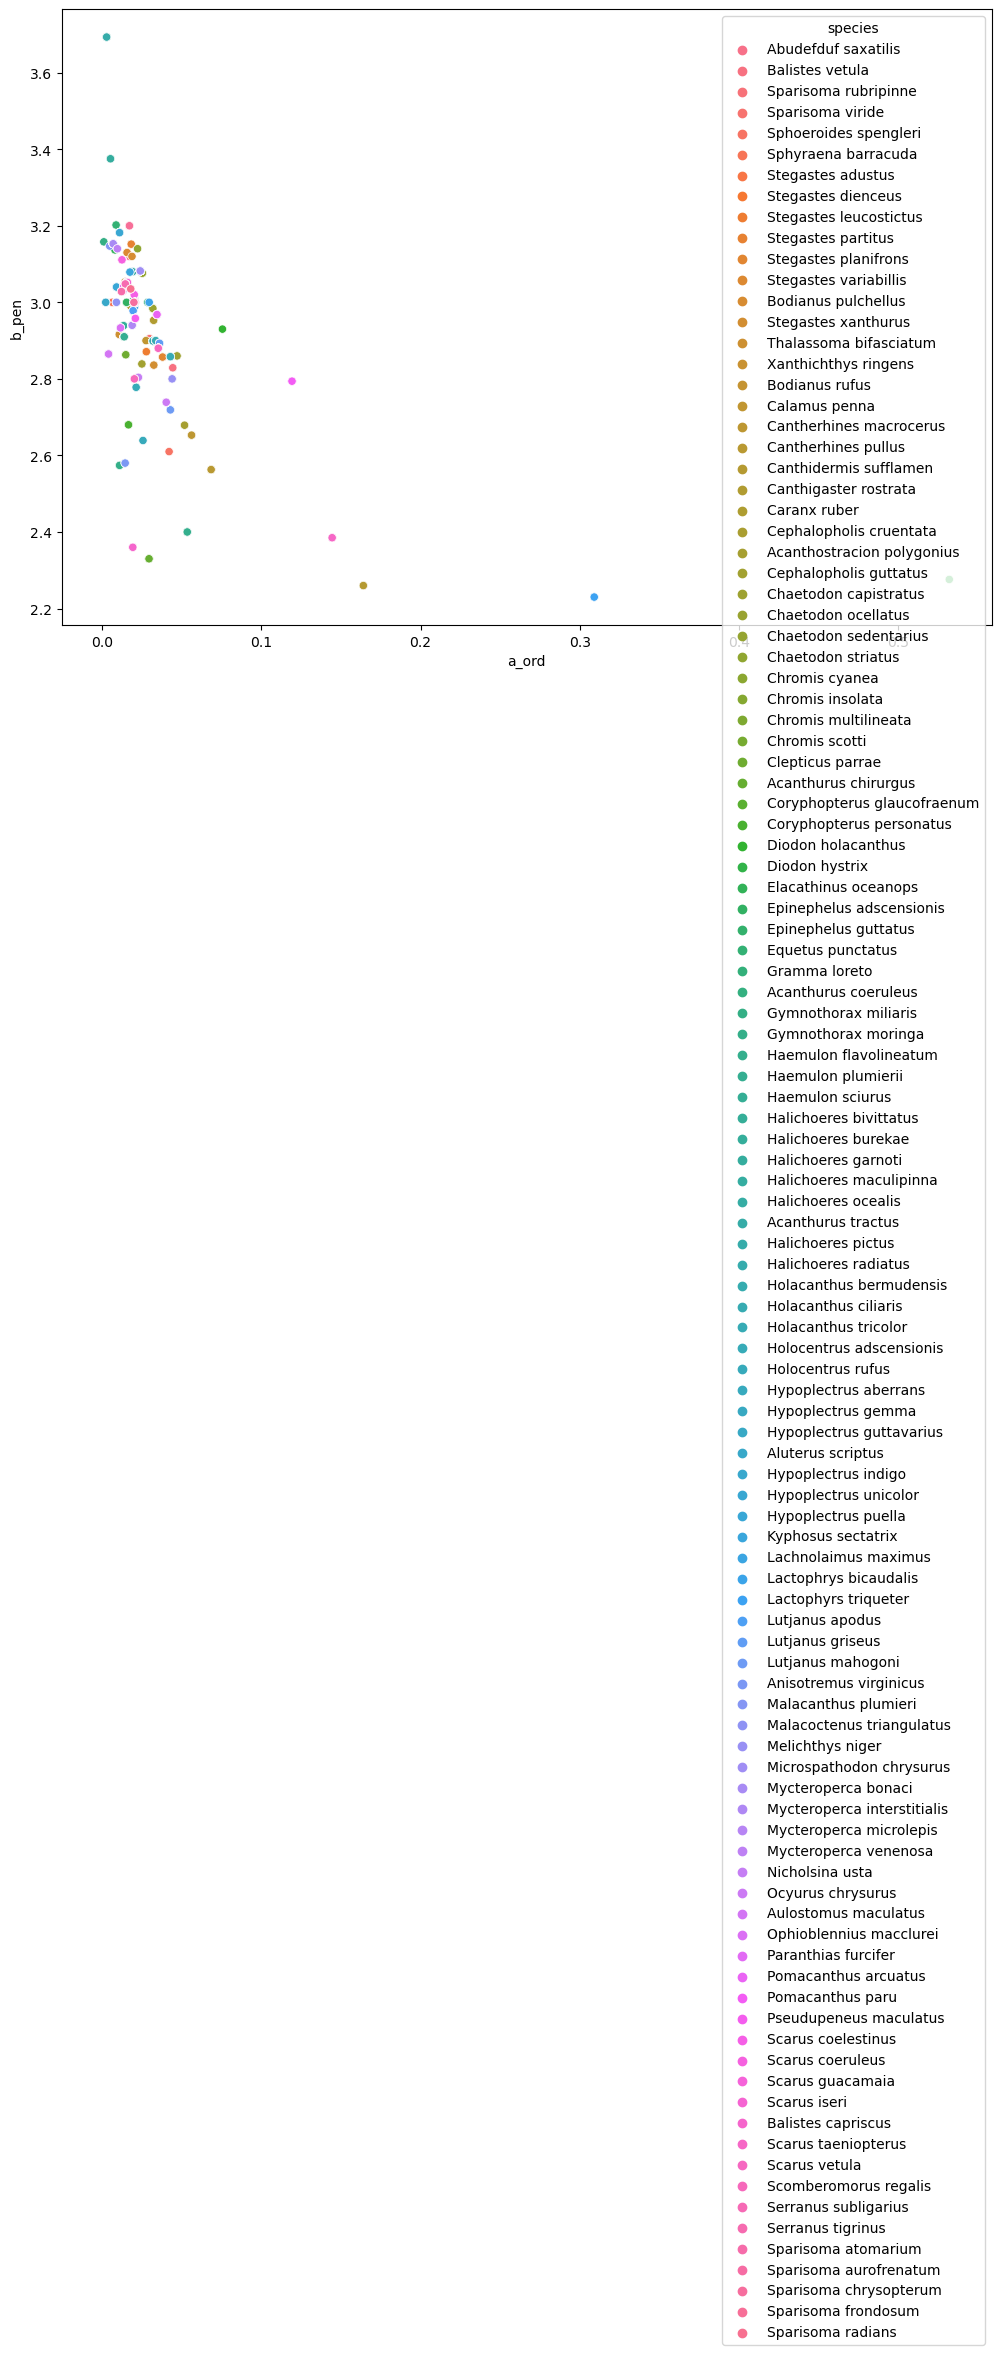

In [4]:
from seaborn import scatterplot
fig, ax = subplots(figsize=(12, 8))
scatterplot(data=fish_df, x='a_ord', y='b_pen', hue='species')

In [5]:
algae_df = pd.read_csv(filepath_or_buffer='/kaggle/input/reef-ecological-assessment-del-norte/Alacranes Reef and Bajos del Norte reef ecological assesment/invertebrate_algae_data.csv')
algae_df.head()

,label,year,month,day,region,island,side,reef,reef_joined,protection_status,...,longitude,habitat,transect,phylum,taxa1,taxa2,taxa3,functional_group,species,quantity
0,ALG,2019,8,7,Alacranes,Arrecife Alacranes,Leeward,Cordillera,1,NTZ,...,-89.706083,Coral,1,Ochrophyta,Phaeophyceae,Dictyotophycidae,Dictyotales,Corticated foliose,Dictyota sp,2
1,ALG,2019,8,7,Alacranes,Arrecife Alacranes,Leeward,Cordillera,1,NTZ,...,-89.706083,Coral,1,Ochrophyta,Phaeophyceae,Dictyotophycidae,Dictyotales,Corticated foliose,Lobophora variegata,86
2,ALG,2019,8,7,Alacranes,Arrecife Alacranes,Leeward,Cordillera,1,NTZ,...,-89.706083,Coral,1,Rhodophyta,Florideophyceae,Corallinophycidae,Corallinales,CCA,Calcarea costrosa,3
3,ALG,2019,8,7,Alacranes,Arrecife Alacranes,Leeward,Cordillera,1,NTZ,...,-89.706083,Coral,2,Ochrophyta,Phaeophyceae,Dictyotophycidae,Dictyotales,Corticated foliose,Dictyota sp,2
4,ALG,2019,8,7,Alacranes,Arrecife Alacranes,Leeward,Cordillera,1,NTZ,...,-89.706083,Coral,2,Ochrophyta,Phaeophyceae,Dictyotophycidae,Dictyotales,Corticated foliose,Lobophora variegata,76


<Axes: xlabel='latitude', ylabel='longitude'>

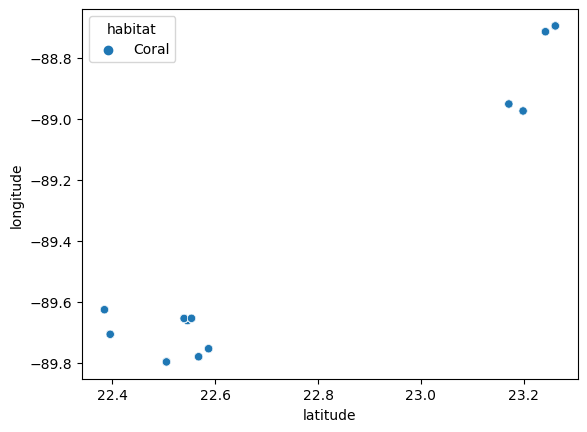

In [6]:
from seaborn import scatterplot
scatterplot(data=algae_df, x='latitude', y='longitude', hue='habitat')

In [7]:
algae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              1031 non-null   object 
 1   year               1031 non-null   int64  
 2   month              1031 non-null   int64  
 3   day                1031 non-null   int64  
 4   region             1031 non-null   object 
 5   island             1031 non-null   object 
 6   side               1031 non-null   object 
 7   reef               1031 non-null   object 
 8   reef_joined        1031 non-null   int64  
 9   protection_status  1031 non-null   object 
 10  latitude           1031 non-null   float64
 11  longitude          1031 non-null   float64
 12  habitat            1031 non-null   object 
 13  transect           1031 non-null   int64  
 14  phylum             859 non-null    object 
 15  taxa1              859 non-null    object 
 16  taxa2              794 n

<Axes: xlabel='latitude', ylabel='longitude'>

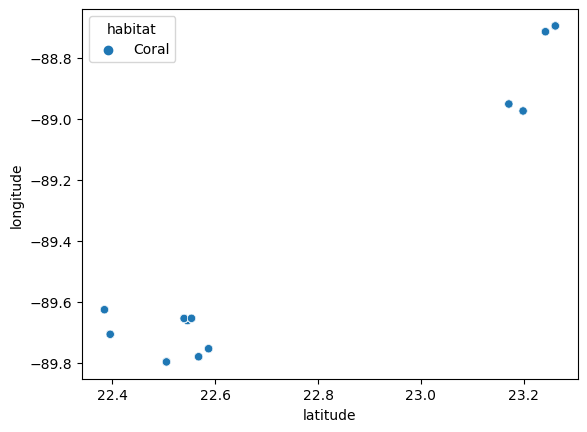

In [8]:
scatterplot(data=algae_df, x='latitude', y='longitude', hue='habitat')